# SVM

## Business Problem
- The data shown here simulates a medical study in which mice infected with a virus were given varius doses of two medicines and then checked 2 weeks later to see if they were still infected.

#### Goal is to create a classification model than predcit (given tow dosage measurements) if the mouse will still be infectious or not. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [4]:
df["Virus Present"].value_counts()

0    200
1    200
Name: Virus Present, dtype: int64

### EDA

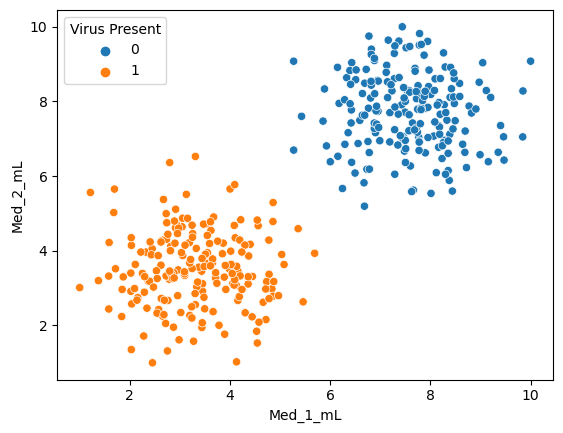

In [5]:
sns.scatterplot(x="Med_1_mL",y="Med_2_mL",hue="Virus Present",data=df)
plt.show()

In [6]:
X = df[["Med_1_mL","Med_2_mL"]]
y = df["Virus Present"]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

## Support Vector Machines (SVM) - With default parameters.

In [10]:
#Modelling
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

#prediction
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

#accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train)) #train accuracy
print(accuracy_score(y_test,ypred_test)) #test accuracy


1.0
1.0


## Hyperparameter Tuning

In [17]:
from sklearn.model_selection import GridSearchCV
estimator = SVC()
param_grid = {"C":[0.01,0.1,1,10,100], "kernel":["linear","rbf","sigmoid","poly"]}
grid = GridSearchCV(estimator,param_grid, cv=5)
grid.fit(X,y)
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

## Rebuild the SVM Model with best parameter.

In [19]:
#Remodeling
from sklearn.svm import SVC
model = SVC(kernel="linear",C=0.01)
model.fit(X_train,y_train)

#prediction
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

#accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train)) #train accuracy
print(accuracy_score(y_test,ypred_test)) #test accuracy


1.0
1.0
